In [1]:
%%html
<h1 align="center"> <font color="red"> Análise de Dados Epidêmicos - Dengue </h1>
<h2 align="center"> <font color="blue"> Aluno: Marcio Colazingari </h2> <br>
    <p align="center"><img src="dados/dengue_animado.gif"></p>
<br>
<h2 align="center"> <font color="green"> Trabalho de Entrega do Curso Enap BootCamp </h2>
<h2 align="center"> Módulo 2 - Ciência de Dados </h2>
<h2 align="center"> Professor: Professor: Alex Lopes </h2> <br>
<h3 align="center"> <font color="brown"> 2020, Escola Nacional de Administração Pública - Enap </h3> 

In [2]:
%%html
<h3> O objetivo deste trabalho será a Análise de Dados sobre a epidemia de dengue em 2 cidades da América Latina.</h3>
<h3> Tratam-se de dois(02) arquivos no formato CSV contendo dados extraídos do sítio da internet: </h3>
<a href="https://www.drivendata.org/" align="center" target="popup"><h2> <img src="dados/drivendata-logo.svg", width="400"> </h2> </a>
<br>

In [3]:
%%html
<h2><font color="red"> Dos dados: </h3> </font>
<h3> Foram fornecidos dois arquivos CSVs contendo:<br>
    1. informações climáticas e de geolocalização ; <br>
    2. quantitativos do espalhamento da doença.</h3>
<h3 align="left"><font color="blue"> Os dados serão analisados <br> com o uso de bibliotecas aprendidas no curso.<br>
<font color="green"> 1. <font color="red"> Pandas e Numpy <font color="green"> para a organização dos dados <br>
2. <font color="green">  <font color="red ">Matplotlib e Seaborn para a <font color="green"> geração de gráficos.


In [4]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%%html
<h2 align="center"> <font color = blue> Carregamento e preparação dos Dados CSVs </h2>

In [6]:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)
df_dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [7]:
%%html
<h2 align="center"> <font color = "red"> Dicionário dos dados - ""algumas colunas"" </font> </h2> 
<font color = "blue"><h3> NDVI (ne,nw,se,sw) - <font color = "gray"> Índice de Vegetação da Diferença Normalizada (-1 planta morta +1 planta saudável ) </h3> 
<font color = "blue"><h3> Preciptation_amt - <font color = "gray"> Preciptação Total </h3>
<font color = "blue"><h3> reanalilysis_air_temp_k - <font color = "gray"> Temperatura do Ar (mean) </h3>
<font color = "blue"><h3> reanalysis_avg_temp_k - <font color = "gray"> Temperatura do ar (avg) </h3>
<font color = "blue"><h3> reanalysis_dew_point_temp_k - <font color = "gray"> Temperatura do ponto de orvalho </h3>
<font color = "blue"><h3> reanalysis_relative_humidity_percent - <font color = "gray"> Umidade Relativa do Ar (mean) </h3>
<font color = "blue"><h3> reanalysis_tdtr_k - <font color = "gray"> Faixa da Temperatura Diurna </h3>
<font color = "blue"><h3> station_diur_temp_rng_c - <font color = "gray"> Faixa de temperatura medidas da estação climática </h3>
<font color = "blue"><h3> total_cases - <font color = "gray"> Casos de Cotaminação Totais </h3>




In [8]:
%%html
<h2 align="center"> <font color = "red"> MOTIVAÇÃO </h2>
<h3><font color="green"> A presença do mosquito Aedes Aegypti na américa latina é motivo de intensa preocupação 
pelas autoridades de saúde. Entre tantas outras maldições, o tal mosquito é transmissor dos tipos virais DENV-x, ocasionador
da doença denominada Dengue. <br><br>
Procedimentos de Ciência de Dados aplicados na área da saúde, em especial estudos de transmissões de doenças, podem 
contribuir com os profissionais deste setor. Tais estudos podem nortear processos de combate à transmissões epidêmicas.
<br><br>
Este estudo promovido em evento de competição (atualmente em andamento) pela entidade Driven Data, tem como objetivo 
promover a análise de dados (estatística) relacionando dados climáticos e regionais com a ocorrência da Dengue em duas cidades 
sj (San Juan) e iq (Iquitos). <br>
No final uma questão: <br> <br> <font color = "black"> </h3>
   <h2 align="center"> Existe correlação das características climáticas na propagação da Dengue? </h2> <br><br>

In [9]:
%%html
<h2 align="center"><font color="blue">Vamos iniciar nossa jornada dando uma espiadinha na estatística descritiva 
na base de dados da dengue </h2></font>
<h3> A tabela abaixo irá apresentar para cada variável informações de: <br>
    -- contagem, mean, desvio padrão, e quartis --<br>

In [10]:
df_dengue.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [29]:
%%html
<h2 align="center"><font color="blue">Análise da tabela Describe: </h2>
<h3><font color="green"> Na tabela acima temos informações da estatísca descritiva para toda a base de dados.
Por exemplo, para a variável que demonstra a qualidade das plantações na região nordeste (nvdi_ne), 
teremos uma média de 0.142 com um desvio padrão de 0.140.Com um range de valores 
entre -0.40 a um valor máximo de 0.508. O valor médio de 0.140 pode representar uma baixa qualidade 
das áreas verdes para esta região, tendo como base as amostras coletadas. <br> <br>
<font color="orange"> Para a variável ano, por exemplo, que é uma variável categórica, temos a indicação que o primeiro ano de contagem
min, é o ano de 1990 e que no útimo ano,max, será 2010. Assim os dados coletados referem-se a um longo período 
de observação (20 anos). <br><br>
<font color="gray"> Para a variável "station_max_temp_c", que representam as medidas de temperatura mais elevadas nos períodos, os valores 
variam entre 26.7 42 graus celsius, compreendendo assim uma região de clima quente, já que o range de temperaturas 
mínimas giram entre 14.7 à 25 graus Celsius. Clima típico das regiões tropicais, característico também pela
elevada proliferação de mosquitos. <br><br>
<font color="red"> A última variável, "total_cases", representa a quantidade de casos totais semanais no período,
registrados por semana. Assim os registros apontam para o valor mínimo de 0 (zero), que significa sem nenhum registro de
ocorrência da doença naquela semana, chegando ao máximo de 461 registros numa dada semana. O que pode levar à tamanha 
variância das ocorrências? Tendo 24 em mean e 43 de desvio padrão.

In [36]:
%%html
<h2 align="center"> Dados numéricos (tabulares) trazem muitas informações (importantes), <br>
porém são de lenta percepção aos nossos olhos. <br> 
Neste caminho, análises gráficas tornam-se 
indispensáveis para a melhor <br>
interpretação dos dados coletados. <br><br><br><br>

In [60]:
%%html
<h2 align=center> <font color="blue"> PLOTAGENS E ANÁLISES GRÁFICAS </h2><br>

In [56]:
%%html
<h3> Vamos começar nossa análise comparando o total de registros por cidades </h3>

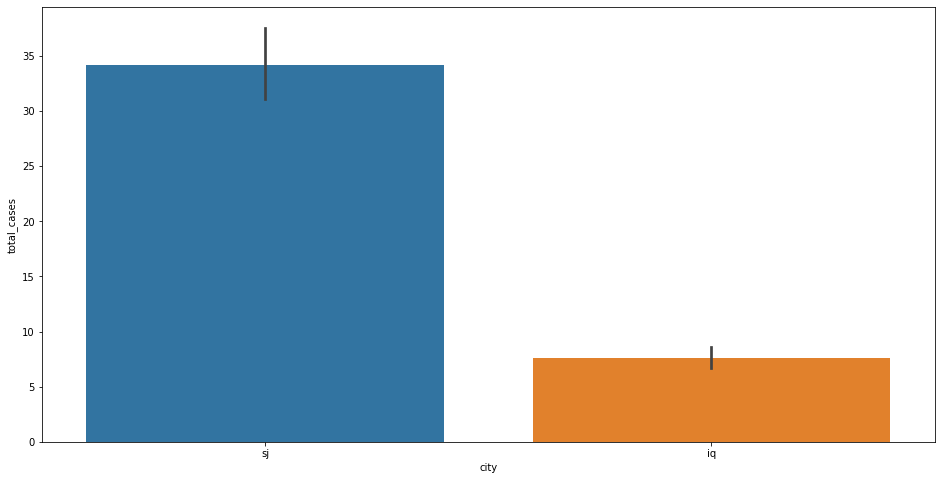

In [58]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_dengue, x="city", y="total_cases")